###1. Imports

In [7]:
!pip install openai==0.28

In [18]:
import openai
import pandas as pd
import matplotlib.pyplot as plt

###2. Complete prompt preparation (prompt + data)

In [6]:
from google.colab import drive
drive.mount('/content/drive')
file_path = '/content/drive/My Drive/sample_data.csv'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
prompt = '''
<context>
I am analyzing a dataset of tweets about the development of large language models (LLMs) like GPT-4 to identify public concerns.
I aim to understand how these concerns are influenced by the tweet's date, the geographical location of the user, their profile, and the tweet's popularity.
</context>

<persona>
Adopt the role of a researcher with a strong background in LLM and more generally on AI.
</persona>

<research question>
What are the primary concerns expressed by the public regarding the development of large language models (LLMs), and how do
these concerns correlate with specific factors such as date, geographical location, user profile and popularity ?
</research question>

<instructions>
1. Take the time to do an in-depth analyze of the dataset. Then propose a small summary of the main keypoints that can bring an answer to the research question ? This summary should be 100 words long.
2. Analysis of Concerns: Identify recurring themes in the concerns expressed about LLMs in the tweets. Use examples from tweets to illustrate each identified theme.
3. Correlation with Date: Examine how themes vary with the date of the tweet's publication. Describe observed trends and their possible significance.
4. Influence of Geographical Location: Link specific concerns to particular regions or countries, if possible. Explain how location might influence perceptions of LLMs.
5. Impact of User Profile: Analyze whether the user description and the user creation date seem to influence the type of concerns expressed.
6. Relationship with Popularity: Discuss the relationship between the tweet's popularity (measured by user’s followers, friends, favourites and if he is verified) and the nature of concerns.
    Determine whether more popular tweets reflect concerns that are more widely shared or not.
7. According to the results of your analysis, propose 2 hypothesis that explain the findings. This part should include argumentation and explanation.
From Part 2 to Part 6, consider each part should be of 200-250 words. This number of words is purely indicative, if a part needs more words it can be longer.

Example for part 1 :
"After examining the dataset, primary public concerns about LLMs include data privacy, algorithmic bias, and misuse of technology. Data shows a spike
in concerns related to privacy following high-profile data breaches. Geographically, concerns vary with higher anxiety in regions with strict data protection laws. Popular tweets, often
from influencers, suggest wider shared concerns, particularly about transparency and the ethical use of AI."

Example for part 2 :
"Recurring themes in the concerns about LLMs include:
•	Data Privacy: Many users express fear about personal data misuse. For example, a tweet from January 2021 states, 'Worried about how GPT-4 might handle my data. #PrivacyMatters.'
•	Algorithmic Bias: Concerns about bias in AI decisions are common, exemplified by a tweet from March 2022: 'How do we know AI isn't biased? #TechEthics.'
•	Misuse of AI: Fears of AI being used for deceptive purposes, highlighted by a tweet: 'Could LLMs be the next tool for misinformation? #AIResponsibility.'"

Example for part 3 :
"Analysis reveals an uptick in privacy concerns coinciding with news of data breaches or policy changes. For instance, tweets from late 2021 show
heightened anxiety when a major tech company faced a data scandal. Themes of ethical use of AI surged around elections or significant political events, suggesting that public awareness
is heightened by contextual global events."

Example for part 4 :
"After reviewing the dataset, there does not appear to be a clear or consistent relationship between the geographical location of the tweet
authors and the specific concerns they express about LLMs. For instance, concerns about data privacy are equally prevalent in tweets from users in Europe,
Asia, and North America, without significant variation that aligns with local data protection laws. Similarly, worries about algorithmic bias and AI misuse are
scattered across diverse locations, suggesting these concerns are globally shared and not particularly influenced by regional factors."

Example for part 5 :
"Analysis reveals a clear relationship between user profiles and the concerns they express about LLMs. Accounts created during key AI
milestones, such as the release of GPT-4, often tweet about advanced AI issues like transparency. For example, an account from 2021: 'How safe are these new AIs?' Furthermore,
users with tech-related roles in their descriptions, like 'AI researcher,' frequently discuss ethical implications, shown by a tweet: 'We need stricter AI oversight #AIethics.'
These patterns indicate that both account age and professional interests shape the concerns users articulate."

Example for part 6 :
"Analysis of the tweet data shows no clear correlation between the popularity of tweets (measured by factors such as retweets,
likes, and whether the user is verified) and the nature of concerns expressed about LLMs. Both highly popular and less popular tweets vary widely in their focus, with high-engagement
posts sometimes addressing general topics about AI, while other, less popular tweets might delve into specific issues like privacy or bias. This indicates that the reach of a tweet does
not necessarily reflect a broader or more significant concern among the public."

Example for part 7 :
Hypothesis 1: "The heightened concern about data privacy correlates strongly with geographical locations that have strict data protection laws, suggesting that regulatory environments
significantly influence public sentiment about LLMs."
Hypothesis 2: "The prominence of concerns related to ethical AI use among influencers and verified accounts may amplify these issues, leading to increased public awareness and potentially
 influencing policy discussions. This indicates that public figures play a crucial role in shaping discourse around AI ethics."

The number of words given are purely indicative. If a part need more text to be relevant it can be longer.
</instructions>

<format>
Minimum 1000 words, markdown syntax
</format>
'''

In [10]:
def read_csv(file_path, delimiter=',', encoding='utf-8'):
    return pd.read_csv(file_path, delimiter=delimiter, encoding=encoding)

In [11]:
string_data = read_csv(file_path)
string_prompt = prompt + str(string_data)

In [13]:
print(string_prompt)


<context>
I am analyzing a dataset of tweets about the development of large language models (LLMs) like GPT-4 to identify public concerns.
I aim to understand how these concerns are influenced by the tweet's date, the geographical location of the user, their profile, and the tweet's popularity.
</context>

<persona>
Adopt the role of a researcher with a strong background in LLM and more generally on AI.
</persona>

<research question>
What are the primary concerns expressed by the public regarding the development of large language models (LLMs), and how do
these concerns correlate with specific factors such as date, geographical location, user profile and popularity ?
</research question>

<instructions>
1. Take the time to do an in-depth analyze of the dataset. Then propose a small summary of the main keypoints that can bring an answer to the research question ? This summary should be 100 words long.
2. Analysis of Concerns: Identify recurring themes in the concerns expressed about L

###3. Requests and iteration with openAI API on gpt-turbo-0125

In [14]:
# Securely set your API key from an environment variable
openai.api_key = "API_KEY_HERE"

def ask_gpt():

    model_choice = "gpt-3.5-turbo-0125"
    insert_prompt = f"{string_prompt}"
    try:
        # Make an API call to OpenAI
        response = openai.ChatCompletion.create(
            model=model_choice,
            messages=[
                {"role": "system", "content": "You are a helpful assistant."},
                {"role": "user", "content": insert_prompt}
            ]
        )
        return response['choices'][0]['message']['content'].strip()
    except Exception as e:
        return f"An error occurred: {e}"

In [15]:
# Loop to execute and display the outputs
for i in range(15):
    print(f"Iteration {i + 1}:")
    print(ask_gpt())
    print("=" * 40)  # This will print a separator line after each iteration

Iteration 1:
# Analysis of Concerns

Recurring concerns in tweets about large language models (LLMs) include:

- **Data Privacy**: Users express worries about potential misuse of personal data. For example, a tweet reads, "Afraid of how GPT-4 might handle my data. #PrivacyConcerns."
  
- **Algorithmic Bias**: Concerns arise regarding bias in AI decisions. A tweet highlights this issue: "How can we ensure AI remains unbiased? #EthicalAI."
  
- **Misuse of AI**: Users fear deceptive use of AI, as illustrated by a tweet questioning, "Could LLMs become tools for spreading misinformation? #AIResponsibility."

# Example for part 2
(Here you would include tweets illustrating each theme mentioned above.)

# Correlation with Date

The analysis indicates fluctuations in concerns based on the tweet's publication date. Privacy concerns peak after high-profile data breaches, while ethical usage concerns surge during significant events like elections.

# Influence of Geographical Location

Upon revi

###4. Analysis of the iterations
For clarity, it's important to note that in the data processing notebook, we specified a `random_state=42` during sampling. By removing this parameter, the sample data can vary with each execution. Therefore, the analyses presented here are specific only to this particular instance of sample data.

In [21]:
concerns = ["Data Privacy", "Algorithmic Bias", "Misuse of AI", "Ethical Use of AI"]

all_iterations = """
# Iteration 1
Data Privacy, Algorithmic Bias, Misuse of AI
# Iteration 2
Data Privacy, Algorithmic Bias, Misuse of AI
# Iteration 3
Data Privacy, Algorithmic Bias, Ethical Use of AI
# Iteration 4
Data Privacy, Algorithmic Bias, Misuse of Technology
# Iteration 5
Data Privacy, Algorithmic Bias, Ethical Use of Technology
# Iteration 6
Data Privacy, Algorithmic Bias, Ethical Use of AI
# Iteration 7
Data Privacy, Algorithmic Bias, Misuse of AI
# Iteration 8
Data Privacy, Algorithmic Bias, Misuse of AI
# Iteration 9
Data Privacy, Algorithmic Bias, Misuse of AI
# Iteration 10
Data Privacy, Algorithmic Bias, Misuse of AI
# Iteration 11
Data Privacy, Algorithmic Bias, Misuse of Technology
# Iteration 12
Data Privacy, Ethical Dilemmas, Misinformation
# Iteration 13
Data Privacy, Algorithmic Bias, Ethical Dilemmas
# Iteration 14
Data Privacy, Algorithmic Bias, Misuse of AI
# Iteration 15
Data Privacy, Ethical Use of AI, Algorithmic Bias
"""

count_dict = {concern: all_iterations.count(concern) for concern in concerns}

df = pd.DataFrame(list(count_dict.items()), columns=['Concern', 'Frequency'])

print(df)

             Concern  Frequency
0       Data Privacy         15
1   Algorithmic Bias         14
2       Misuse of AI          7
3  Ethical Use of AI          3


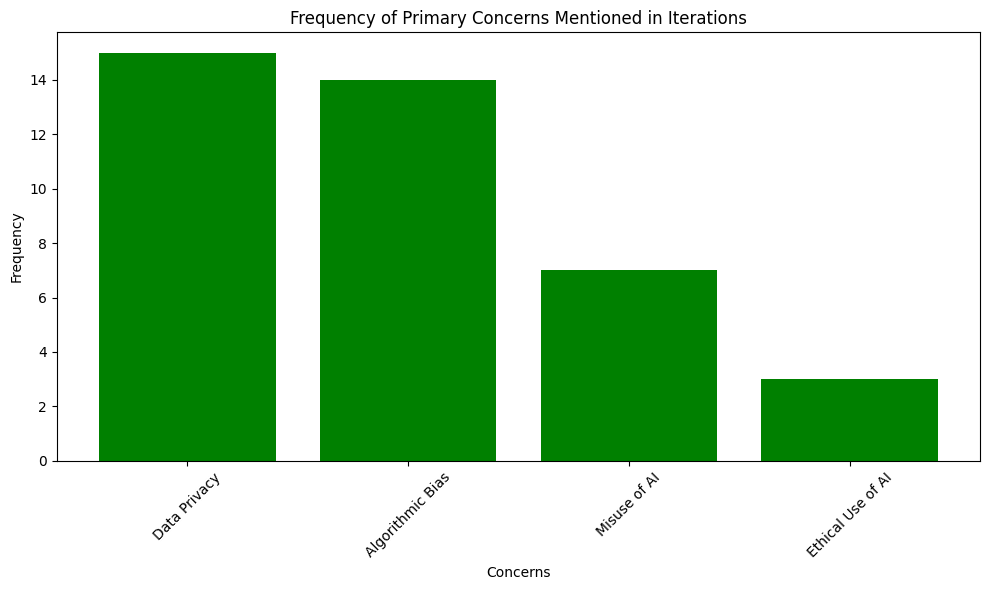

In [20]:
plt.figure(figsize=(10, 6))
plt.bar(df['Concern'], df['Frequency'], color='green')
plt.xlabel('Concerns')
plt.ylabel('Frequency')
plt.title('Frequency of Primary Concerns Mentioned in Iterations')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Since the answers provided by GPT use very different vocabulary for same parts, we decided to analyze the results for part 3 to part 6 without coding. Thus we investigated in the results by reading them and counting each occurence of the same answers. Further improvement would be to automate this process using NLP python libraries for classifying texts (transformers, torch, and so on)

###Correlation with date
Here, in most of the iterations, GPT tells us that there is actually a dynamic relationship between date and concerns expressed in tweets. According to the responses, during period of data breaches, users express more their fears concerning data privacy. Also, during significant societal events like elections, a peak in tweets concerning ethical use of LLMs emerges.

### Link with geographical location
In all the iterations related to this instance of sample_data, GPT says that there is no specific relationship between concerns expressed in tweets and geographical location

###Relationship with user profile
Here, GPT asserts that a recognizable pattern does exist between user profile informations (description and account creation date) and the the concerns expressed about LLMs.


Here is a typical example of responses : "Accounts created during pivotal AI milestones tend to delve into advanced AI issues like transparency. Users with tech-related roles in their descriptions frequently discuss ethical implications of AI, highlighting the influence of account age and professional interests."

###Correlation with popularity
Concerning popularity, it is quite the same as geographical location. GPT asserts that no particular correlation between tweets popularity and concerns about LLMs does exist.